In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('weather_forecast_data.csv')

In [3]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [4]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [9]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'cloud_cover', 'pressure',
       'rain'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'cloud_cover', 'pressure',
       'rain'],
      dtype='object')

In [11]:
num_cols = df.dtypes[df.dtypes != 'object'].index.to_list()

In [12]:
for col in num_cols:
    df[col] = np.round(df[col], 2)
    

In [13]:
df.head()

,temperature,humidity,wind_speed,cloud_cover,pressure,rain
0,23.72,89.59,7.34,50.50,1032.38,rain
1,27.88,46.49,5.95,4.99,992.61,no rain
2,25.07,83.07,1.37,14.86,1007.23,no rain
3,23.62,74.37,7.05,67.26,982.63,rain
4,20.59,96.86,4.64,47.68,980.83,no rain


In [14]:
df.isnull().sum()

temperature    0
humidity       0
wind_speed     0
cloud_cover    0
pressure       0
rain           0
dtype: int64

In [15]:
df['rain'].value_counts()

rain
no rain    2186
rain        314
Name: count, dtype: int64

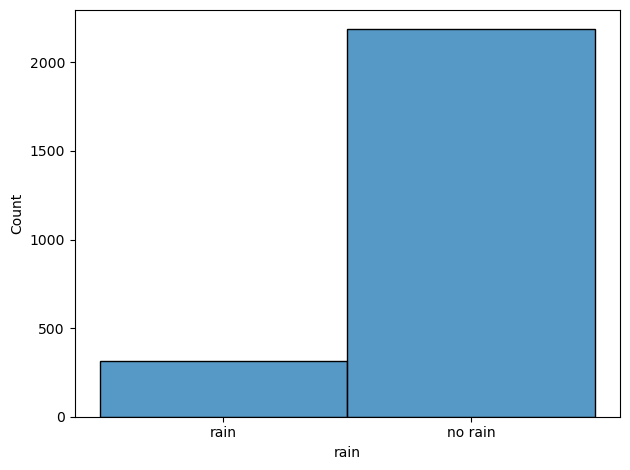

In [16]:
sns.histplot(df['rain'], bins=50)
plt.tight_layout()
plt.show()

In [18]:
df[num_cols].corr()

,temperature,humidity,wind_speed,cloud_cover,pressure
temperature,1.000000,-0.014120,-0.004938,0.006628,-0.007479
humidity,-0.014120,1.000000,0.003810,0.007244,-0.032084
wind_speed,-0.004938,0.003810,1.000000,-0.000403,0.018769
cloud_cover,0.006628,0.007244,-0.000403,1.000000,0.023098
pressure,-0.007479,-0.032084,0.018769,0.023098,1.000000


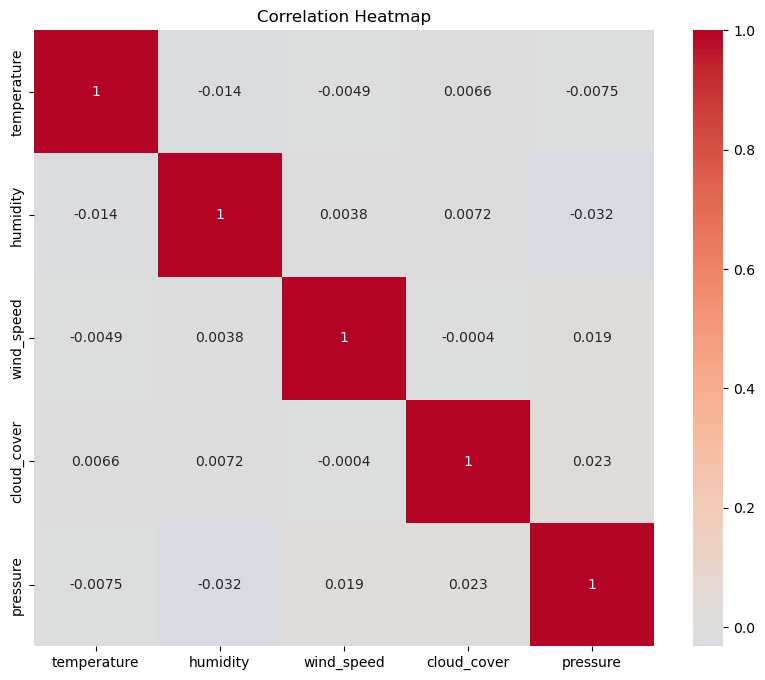

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()